Machine Learning and Pattern Recognition (Revision)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression

$$f(\mathbf x) = \mathbf w^\top \mathbf x$$

## Gradient

- Residual: $\mathbf r = \mathbf y - X \mathbf w$
- Residual sum of squares (RSS): $\mathbf r^\top \mathbf r = (\mathbf y - X \mathbf w)^\top (\mathbf y - X \mathbf w) = \mathbf y^\top \mathbf y - 2 \mathbf w^\top X^\top \mathbf y + \mathbf w^\top X^\top X \mathbf w$
- Gradient w.r.t weights: $\nabla_{\mathbf w} (\mathbf r^\top \mathbf r) = -2 X^\top \mathbf y + 2 X^\top X \mathbf w$
- Fitted weights (closed form): $\hat{\mathbf w} = (X^\top X)^{-1} X \mathbf y$

> $\nabla_{\mathbf x} (\mathbf x^\top \mathbf a) = \mathbf a$, $\nabla_{\mathbf x} (\mathbf x^\top A \mathbf x) = A \mathbf x + A^\top \mathbf x$

In [2]:
X = np.array(
    [[1, 2, 3], 
     [2, 3, 4], 
     [3, 4, 5]]
) # 3*3 matrix
y = np.array([6, 9, 12])
print('X has shape {} and rank {}.'.format(X.shape, np.linalg.matrix_rank(X))) # Rank=2 because row3 = 2*row2 - row1

X has shape (3, 3) and rank 2.


In [3]:
try:
    print(np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y)))
except Exception as exception:
    print(type(exception).__name__)

[ 160. -317.  160.]


In [4]:
try:
    print(np.dot(np.linalg.solve(np.dot(X.T, X), X.T), y))
except Exception as exception:
    print(type(exception).__name__)

[  84.75 -166.5    84.75]


## Polynomials

For univariate, $\boldsymbol\phi (x) = (1, x, x^2, \cdots, x^K)^\top$. 

For multivariate, $\boldsymbol\phi (\mathbf x) = (1, x_1, x_2, \cdots x_D, x_1 x_2, x_1 x_3, \cdots, x_{D-1} x_D, x_D^2, \cdots)^\top$

## Radial Basis Function (RBF)

$$\phi_k (\mathbf x) = \exp (-(\mathbf x - \mathbf c)^\top (\mathbf x - \mathbf c)) / h^2$$

**Properties:**
1. Bell-curve shaped, proportional to Gaussian
1. Max at $\mathbf x = \mathbf c$ (centred at $\mathbf c$)
1. $h$ is 'bandwidth', larger is wider

In [5]:
def rbf_1d(xx, cc, hh):
    return np.exp(-(xx-cc) ** 2 / hh ** 2)
def rbf_2d(xx, cc, hh):
    return np.exp(-(xx-cc).dot(xx-cc) / hh**2)

In [6]:
grid_size = 0.1
x_grid = np.arange(-10, 10, grid_size)

X, Y = np.meshgrid(x_grid, x_grid)

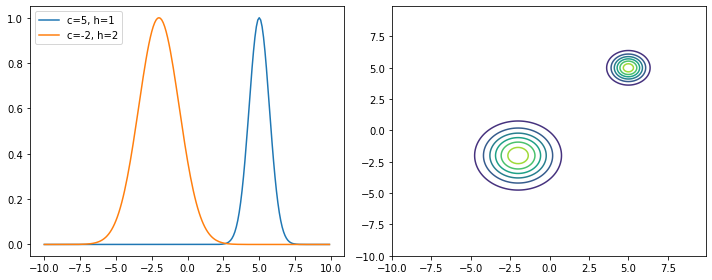

In [7]:
Z1 = np.array([rbf_2d(np.array([x,y]), np.array([5,5]), 1) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)
Z2 = np.array([rbf_2d(np.array([x,y]), np.array([-2,-2]), 2) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

plt.subplots(1, 2, figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(x_grid, rbf_1d(x_grid, cc=5, hh=1), label='c=5, h=1')
plt.plot(x_grid, rbf_1d(x_grid, cc=-2, hh=2), label='c=-2, h=2')
plt.legend(loc=0)

plt.subplot(1, 2, 2)
plt.contour(X, Y, Z1)
plt.contour(X, Y, Z2)

plt.tight_layout()

## Logistic-sigmoid Function

$$\sigma(\mathbf v^\top \mathbf x + b) = \frac{1}{1 + \exp (-\mathbf v^\top \mathbf x -b)}$$

**Properties:**
1. S-shaped, saturates at 0 and 1
1. Parallel contour in 2D
1. $\mathbf v$ determines the steepness
1. $b$ determines the position

In [8]:
def lsf_1d(xx, vv, b):
    return (1. / (1 + np.exp(-vv*xx - b)))
def lsf_2d(xx, vv, b):
    return (1. / (1 + np.exp(-vv.dot(xx) - b)))

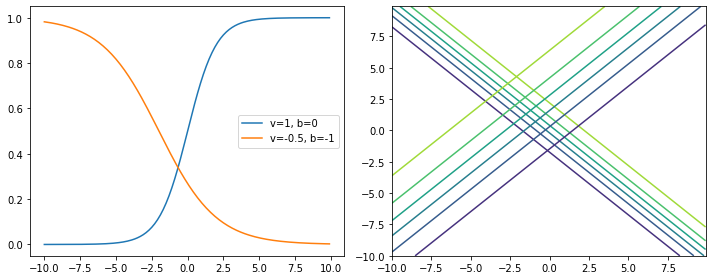

In [9]:
Z1 = np.array([lsf_2d(np.array([x,y]), np.array([1,1]), 0) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)
Z2 = np.array([lsf_2d(np.array([x,y]), np.array([-0.5,0.5]), -1) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

plt.subplots(1, 2, figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(x_grid, lsf_1d(x_grid, 1, 0), label='v=1, b=0')
plt.plot(x_grid, lsf_1d(x_grid, -0.5, -1), label='v=-0.5, b=-1')
plt.legend(loc=0)

plt.subplot(1, 2, 2)
plt.contour(X, Y, Z1)
plt.contour(X, Y, Z2)

plt.tight_layout()

## Overfitting

- Fitting many features
- Explaning noise with many basis function

## Regularisation

Penalising extreme solutions of weights by adding sum of the square weights in the cost function. 

### L2 regularisation

\begin{align*}
&&E_\lambda (\mathbf w; \mathbf y, \Phi) &= (\mathbf y - \Phi \mathbf w)^\top (\mathbf y - \Phi \mathbf w) + \lambda \mathbf w^\top \mathbf w \\
\Rightarrow &&\hat{\mathbf w} &= (\Phi^\top \Phi + \lambda \mathbb I)^{-1} \Phi^\top \mathbf y
\end{align*}

By rewriting $\mathbf y' = \begin{pmatrix} \mathbf y \\ \mathbf 0_K \end{pmatrix}$ and $\Phi' = \begin{pmatrix} \Phi \\ \sqrt{\lambda} \mathbb I_K \end{pmatrix}$, then 

$$E_\lambda (\mathbf w; \mathbf y', \Phi') = (\mathbf y' - \Phi' \mathbf w)^\top (\mathbf y' - \Phi' \mathbf w)$$

### L1 regularisation

$$c(\mathbf w) = E(\mathbf w) + \lambda \sum_d |w_d| = E(\mathbf w) + \lambda \| \mathbf w \|_1$$

- Some of the parameters will often be exactly zero
- **Pros:** L1 regulariser gives spase solutions and its convex (possible to find global optimum if error function is also convex)
- **Cons:** L1 regulariser is not differentiable at zero

# Training, Testing and Evaluating Models

## Baseline

For example, $f(x) = b$ or $f(\mathbf x) = \mathbf w^\top \mathbf x + b$. 

## Nested models

Nested models (models with weights constraint to 0) always perform worse than the models without the constraint. 

## Generalisation error and test error

If test cases are from some (data) distribution $p(\mathbf x, y)$, 

$$\text{Generalisation error} = \mathbb E_{p(\mathbf x, y)} [L(y, f(\mathbf x)] = \int L(y, f(\mathbf x)) p(\mathbf x, y) \mathrm d \mathbf x \mathrm d y$$

Using [Monte Carlo](#Monte-Carlo-approximation) (unbiased) estimate, 

$$\text{Average test error} = \frac{1}{M} \sum_{m=1}^{M} L \left( y^{(m)}, f(\mathbf x^{(m)}) \right), \quad \mathbf x^{(m)}, y^{(m)} \sim p(\mathbf x, y)$$

One can show $\mathbb E [\text{Average test error}] = \text{Generalisation error}$. 

## Spiltting data

One sensible split: 80% training, 10% validation, 10% testing. 

## $K$-fold cross-validation

- Outer fold: select model with lowest validation error, when averaged over $K$ folds
    - Inner fold: select hyperparameter such as $\lambda$

## Limitations of test set errors

- Future data often won't be drawn form the same distribution as training data, such as time-series. 
- Only say how well the models make prediction, under the given distribution. 

# Gaussian Distribution

## Univariate Gaussian

$$p(x) = \mathcal N(x; \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(x-\mu)^2}{2\sigma^2} \right)$$

## Central Limit Theorem (CLT)

Sum of random variables sampled identically and independently from some distribution is Gaussian. 

## Error bars

$$E(\hat\theta) \pm ESE(\hat\theta)$$

## Model comparison

$$\delta_m = L(y_m, f(x_m;B)) - L(y_m, f(x_m;A)) > 0 \text{ significantly}$$

Or formally, a paired t-test. 

## Multivariate Gaussian

**Transformation:** $\begin{cases}
    \mathbf x \overset{iid}{\sim} \mathcal N(0,1) \\
    \mathbf y = A \mathbf x
\end{cases} \Rightarrow \mathrm{cov}(\mathbf y) = \Sigma = AA^\top$

$$p(\mathbf x) = \mathcal N(\mathbf x; \boldsymbol\mu, \Sigma) = \frac{1}{|\Sigma|^{1/2} (2\pi)^{D/2}} \exp \left( -\frac{1}{2} (\mathbf x - \boldsymbol\mu)^\top \Sigma^{-1} (\mathbf x - \boldsymbol\mu) \right)$$

$\Sigma$ should be positive definite or positive semi-definite. 

If $\Sigma$ is positive semi-definite, $\Sigma$ is not invertible. For example, if $x_1 = x_2$, $\Sigma = \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix}$. 

Given a joint distribution

$$p(\mathbf f, \mathbf g) = \mathcal N \left( \begin{bmatrix}
    \mathbf f \\ \mathbf g
\end{bmatrix}; \begin{bmatrix}
    \boldsymbol\mu_f \\ \boldsymbol\mu_g
\end{bmatrix}, \begin{bmatrix}
    \Sigma_f & C \\ C^\top & \Sigma_g
\end{bmatrix} \right) \text{, }$$

- Marginal distribution: $p(\mathbf f) = \mathcal N(\mathbf f; \boldsymbol\mu_f, \Sigma_f)$
- Conditional distribution: $p(\mathbf f | \mathbf g) = \mathcal N \left( \mathbf f; \boldsymbol\mu_f + C \Sigma_g^{-1} (\mathbf g - \boldsymbol\mu_g), \Sigma_f - C \Sigma_g^{-1} C^\top \right)$

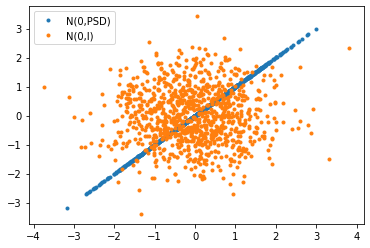

In [10]:
mean = np.array([0,0])
cov = np.ones((2,2))
rng = np.random.RandomState(0)

xs, ys = rng.multivariate_normal(mean, cov, 1000).T
plt.plot(xs, ys, '.', label='N(0,PSD)')

cov = np.diag((1,1))
xs, ys = rng.multivariate_normal(mean, cov, 1000).T
plt.plot(xs, ys, '.', label='N(0,I)')

plt.legend(loc=0)
plt.show()

# Classification

## Linear regression

$$\mathbb E_p [(y-f)^2] = p(y=1) \cdot (1-f)^2 + p(y=0) \cdot (0-f)^2 = f^2 - 2p_1 f + p_1 \quad \Rightarrow \quad \hat f = p_1$$

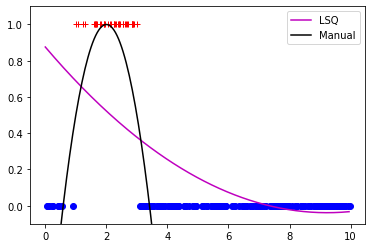

In [11]:
rng = np.random.RandomState(0)
# Train model on synthetic dataset
N = 200
X = np.random.rand(N, 1)*10
yy = (X > 1) & (X < 3)
def phi_fn(X):
    return np.concatenate([np.ones((X.shape[0],1)), X, X**2], axis=1)
ww = np.linalg.lstsq(phi_fn(X), yy, rcond=None)[0]

# Predictions
x_grid = np.arange(0, 10, 0.05)[:,None]
f_grid = np.dot(phi_fn(x_grid), ww)

# Predictions with alternative weights:
w2 = [-1, 2, -0.5] # Values set by hand
f2_grid = np.dot(phi_fn(x_grid), w2)

# Show demo
plt.clf()
plt.plot(X[yy==1], yy[yy==1], 'r+')
plt.plot(X[yy==0], yy[yy==0], 'bo')
plt.plot(x_grid, f_grid, 'm-', label='LSQ')
plt.plot(x_grid, f2_grid, 'k-', label='Manual')
plt.ylim([-0.1, 1.1])
plt.legend(loc=0)
plt.show()

## 'One-hot' encoding

Represent categorical varible as binary vector. 

## Gaussian Bayes classifier

$$p(\mathbf x | y=k) = \mathcal N(\mathbf x; \boldsymbol\mu_k, \Sigma_k) \overset{\text{Bayes' Rule}}{\underset{P(y=k)=\pi_k}{\Longrightarrow}} P(y=k | \mathbf x, \{\boldsymbol\mu_k, \Sigma_k, \pi_k\}) = \frac{\mathcal N(\mathbf x; \boldsymbol\mu_k, \Sigma_k) \pi_k}{\sum_{k'} \mathcal N(\mathbf x; \boldsymbol\mu_{k'}, \Sigma_{k'}) \pi_{k'}}$$

- Parameters $\theta = \{\boldsymbol\mu_k, \Sigma_k, \pi_k\}$ are estimated empirically. 
- Decision boundary for binary classification is quadratic. 

\begin{align*}
    &&P(y=0|\mathbf x) &= P(y=1|\mathbf x) \\
    \Leftrightarrow &&\log \mathcal N(\mathbf x; \boldsymbol\mu_0, \Sigma_0) &= \log \mathcal N(\mathbf x; \boldsymbol\mu_1, \Sigma_1) \\
    \Leftrightarrow &&-\frac{1}{2} (\mathbf x - \boldsymbol\mu_0)^\top \Sigma_0^{-1} (\mathbf x - \boldsymbol\mu_0) - \frac{1}{2} \log |\Sigma_0| &= -\frac{1}{2} (\mathbf x - \boldsymbol\mu_1)^\top \Sigma_1^{-1} (\mathbf x - \boldsymbol\mu_1) - \frac{1}{2} \log |\Sigma_1| \\
    \Leftrightarrow &&\mathbf x^\top (\Sigma_0^{-1} - \Sigma_1^{-1}) \mathbf x - 2 (\boldsymbol\mu_0^\top \Sigma_0^{-1} - \boldsymbol\mu_1^\top \Sigma_1^{-1}) \mathbf x &= Const
\end{align*}

## Naive Bayes classifier

- Naive assumption: Features are independent. 

$$P(\mathbf x|y=k, \theta) = \prod_d P(x_d | y=k, \theta)$$

- Usually for features that are artitrary discrete distribution. 

- Gaussian naive Bayes: Covariance matrix $\Sigma_k$ are diagonal. 

In [12]:
from scipy.stats import multivariate_normal

def GBC(x0, y0, x1, y1):
    rng = np.random.RandomState(0)
    mu0 = np.array([x0.mean(), y0.mean()])
    Sigma0 = np.cov(x0, y0)
    mu1 = np.array([x1.mean(), y1.mean()])
    Sigma1 = np.cov(x1, y1)
    xx = rng.uniform(-10, 10, (2, 5000)).T
    xx_class = multivariate_normal.pdf(xx, mu0, Sigma0) < multivariate_normal.pdf(xx, mu1, Sigma1)
    return xx[np.logical_not(xx_class)], xx[xx_class]

def GNB(x0, y0, x1, y1):
    rng = np.random.RandomState(0)
    mu0 = np.array([x0.mean(), y0.mean()])
    Sigma0 = np.diag([x0.std(), y0.std()])
    mu1 = np.array([x1.mean(), y1.mean()])
    Sigma1 = np.diag([x0.std(), y0.std()])
    xx = rng.uniform(-10, 10, (2, 5000)).T
    xx_class = multivariate_normal.pdf(xx, mu0, Sigma0) < multivariate_normal.pdf(xx, mu1, Sigma1)
    return xx[np.logical_not(xx_class)], xx[xx_class]

In [13]:
rng = np.random.RandomState(0)
mean0 = np.array([-1.5,-2.5])
cov0 = np.array([[1, 0.9], [0.9, 1]])
x0, y0 = rng.multivariate_normal(mean0, cov0, 1000).T

mean1 = np.array([-1,-1])
cov1 = np.array([[1, -0.8], [-0.8, 1]])
x1, y1 = rng.multivariate_normal(mean1, cov1, 1000).T

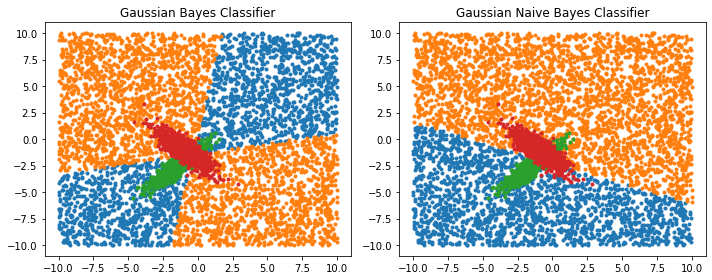

In [14]:
plt.subplots(1, 2, figsize=(10, 4))

plt.subplot(1, 2, 1)
c0, c1 = GBC(x0, y0, x1, y1)
xx0, yy0 = c0.T
xx1, yy1 = c1.T
plt.plot(xx0, yy0, '.')
plt.plot(xx1, yy1, '.')
plt.plot(x0, y0, '.')
plt.plot(x1, y1, '.')
plt.title('Gaussian Bayes Classifier')

plt.subplot(1, 2, 2)
c0, c1 = GNB(x0, y0, x1, y1)
xx0, yy0 = c0.T
xx1, yy1 = c1.T
plt.plot(xx0, yy0, '.')
plt.plot(xx1, yy1, '.')
plt.plot(x0, y0, '.')
plt.plot(x1, y1, '.')
plt.title('Gaussian Naive Bayes Classifier')

plt.tight_layout()

## Logistic regression

- Distribution: $y^{(n)} \sim \mathrm{Ber} \left( f(\mathbf x; \mathbf w) \right)$
- Outputs: $\displaystyle f(\mathbf x; \mathbf w) = \sigma(\mathbf w^\top \mathbf x) = \frac{1}{1 + \exp (\mathbf w^\top \mathbf x)}$
- Likelihood: $\displaystyle L(\mathbf w) = \prod_{n=1}^N P(y^{(n)} | \mathbf x^{(n)}, \mathbf w) = \prod_{n=1}^N \sigma(\mathbf w^\top \mathbf x)^{y^{(n)}} (1-\sigma(\mathbf w^\top \mathbf x))^{(1-y^{(n)})}$
- Loss function (negative log-likelihood, NLL): 

\begin{align*}
    \mathrm{NLL} &= - \sum_{n: y^{(n)}=1} \log \sigma(\mathbf w^\top \mathbf x) - \sum_{n: y^{(n)}=0} \log (1 - \sigma(\mathbf w^\top \mathbf x)) \\
    &\bigg(\sigma(-a) = 1-\sigma(a) \quad z^{(n)} = 2 y^{(n)} -1 \bigg) \\
    &= -\sum_{n=1}^N \log \sigma(z^{(n)} \mathbf w^\top \mathbf x^{(n)}) \\
\end{align*}

- Gradients: $\displaystyle\nabla_{\mathbf w} \mathrm{NLL} = -\sum_{n=1}^N (1-\sigma_n) z^{(n)} \mathbf x^{(n)}$

## Softmax regression

- Distribution: $y_k^{(n)} \sim \mathrm{Ber}\left( f_k(\mathbf x; W) \right)$
- Outputs: $\displaystyle f_k = \frac{\exp \left( (\mathbf w^{(k)})^\top \mathbf x \right)}{\sum_{k'} \exp \left( (\mathbf w^{(k')})^\top \mathbf x \right)}$
> $K$ possible classes. Actual class $c$. $y_k = \delta_{kc} = \begin{cases} 1 & k=c \\ 0 & k \neq c \end{cases}$. 
- Stochastic gradients: $\nabla_{\mathbf w^{(k)}} \log f_c = \delta_{kc} \mathbf x - f_k \mathbf x = (y_k - f_k) \mathbf x$
- When there is no regularisation, for $K$ weights $\mathbf w^{(k)}$, one of them is redundant, because of the degrees of freedom. 

## Latent variable model (LVM)

- Latent variable $m$: $P(m) = \begin{cases} 1-\epsilon & m=1 \\ \epsilon & m=0 \end{cases}$
- $\displaystyle P(y=1 | \mathbf x, \mathbf w, m) = \begin{cases} \sigma(\mathbf w^\top \mathbf x) & m=1 && \text{correct label} \\ \frac{1}{2} & m=0 && \text{wrong label} \end{cases}$
- Outputs: $\displaystyle P(y=1 | \mathbf x, \mathbf w) = \sum_{m \in \{0,1\}} P(y=1, m| \mathbf x, \mathbf w) = (1-\epsilon)\sigma(\mathbf w^\top \mathbf x) + \frac{\epsilon}{2}$
- Set $\epsilon$ by hand so as to 'penalise' extreme observations, or, optimise $\epsilon$ by reparametrising $b = \mathrm{logit}(\epsilon)$ and use gradient based methods. 

### Gaussian mixture models

- **Latent variable:** $\displaystyle z^{(n)} \sim \mathrm{Discrete}(\boldsymbol\pi)$, i.e. $\displaystyle p(z^{(n)}=k) = \pi_k$
- **Mixture component:** $\displaystyle p(\mathbf x^{(n)} | z^{(n)}=k, \theta) = \mathcal N(\mathbf x^{(n)}; \boldsymbol\mu_k, \Sigma_k)$, where $\theta = \{ \boldsymbol\pi, \{ \boldsymbol\mu_k, \Sigma_k \} \}$
- **Log-likelihood:** $\displaystyle \log p(\mathcal D | \theta) = \sum_{n=1}^N \log p(\mathbf x^{(n)} | \theta) = \sum_{n=1}^N \log \left[ \sum_{k=1}^K \pi_k p(\boldsymbol x^{(n)} | z^{(n)} = k, \boldsymbol\theta) \right]$

#### Gradient-based fitting

- Parameters need to be transformed to be unconstrained. 
    - Covariance matrix $\Sigma$: $\Sigma = LL^\top$, where $L_{ij} = \begin{cases}
        \tilde L_{ij} & i \neq j \\ \exp \tilde L_{ij} & i=j
    \end{cases}$
    - Latent varialbe probability $\boldsymbol\pi$: use softmax
- Don't initialise parameters as $\begin{cases} \boldsymbol\mu_k = \mathbf 0 \\ \Sigma_k = \mathbb I \end{cases}$, otherwise all points move together in each iteration because of the identical gradients of NLL. 

#### Expectation-maximisation (EM) algorithm

- **E-step:** Set soft responsibilities
$$r_k^{(n)} = P(z^{(n)}=k | \boldsymbol x^{(n)}, \boldsymbol\theta) = \frac{\pi_k \mathcal N(\boldsymbol x^{(n)}; \boldsymbol\mu_k, \Sigma_k)}{\sum_{k'}\pi_{k'} \mathcal N(x^{(n)}; \boldsymbol\mu_{k'}, \Sigma_{k'})} \text{,} \quad r_k = \sum_{n=1}^N r_k^{(n)}$$

- **M-step:** Update parameter $\theta$
$$\pi_k = \frac{r_k}{N} \text{,} \quad \boldsymbol\mu_k = \frac{1}{r_k} \sum_{n=1}^N r_k^{(n)} \boldsymbol x^{(n)} \text{,} \quad \Sigma_k = \displaystyle\frac{1}{r_k} \sum_{n=1}^N r_k^{(n)} \boldsymbol x^{(n)} \boldsymbol x^{(n)\top} - \boldsymbol\mu_k \boldsymbol\mu_k^\top$$

##### Theoretical basis

\begin{align*}
    && D_{KL} \left( Q(\mathbf z) \| P(\mathbf z|X, \theta) \right) &= \sum_{\mathbf z} Q(\mathbf z) \log \frac{Q(\mathbf z)}{P(\mathbf z | X, \theta)} \\
    && &= \sum_{\mathbf z} Q(\mathbf z) \log \frac{Q(\mathbf z)}{p(X, \mathbf z | \theta)} + \log p(X|\theta) \geq 0 \\
    \Rightarrow && \log p(X|\theta) &\geq \mathcal L(Q, \theta) \\
    && &= \sum_n \sum_k Q(z^{(n)}=k) \log \left[ \pi_k \mathcal N(\mathbf x^{(n)}; \boldsymbol\mu_k, \Sigma_k) \right] - \sum_{\mathbf z} Q(\mathbf z) \log Q(\mathbf z)
\end{align*}

- **E-step:** $Q(z^{(n)}=k) = P(z^{(n)}=k | \mathbf x^{(n)}, \theta^{(t)}) = r_k^{(n)}$
- **M-step:** $\displaystyle \theta^{(t+1)} = \underset{\theta}{\mathrm{arg\,max}} \mathcal L(Q, \theta)$

# Optimisation

## Gradient descent

- Steepest Gradient Descent: $\mathbf w \leftarrow \mathbf w - \eta \nabla_{\mathbf w} (\mathbf r^\top \mathbf r)$
- Stochastic Gradient Descent: Use gradient of mini-batch of examples

## Newton's method

- **Gradient:** $\displaystyle \mathbf g = \left. \nabla_{\mathbf w} E(\mathbf w) \right|_{\mathbf w= \mathbf w^{(t)}}$
- **Hessian matrix:** $\displaystyle H_{ij} = \left. \frac{\partial^2 E(\mathbf w)}{\partial w_i \partial w_j} \right|_{\mathbf w = \mathbf w^{(t)}}$
- **Newton's update:** $\displaystyle \mathbf w^{(t+1)} = \mathbf w^{(t)} + H^{-1} \mathbf g$
- **Pros:**
    - If cost function is quadratic with optimum $\mathbf w^*$ and Hessian $H$, MLE converges in one update. 
    - If cost function is nearly quadratic, convergence is fast
    - No need to tell whether maximising or minimising
- **Cons:**
    - May converge to a saddle-point (local optimum)
    - High-memory needed for storing Hessian
    - Computational expensive for computing inverse of Hessian

# Neural Networks

## Example

- Input layer: $\mathbf x$, shape (D,)
- First layer: $\mathbf h^{(1)} = g^{(1)} (W^{(1)} \mathbf x + \mathbf b^{(1)})$, where $W^{(1)}$ has shape (K, D)
- Second layer: $\mathbf h^{(2)} = g^{(2)} (W^{(2)} \mathbf h^{(1)} + \mathbf b^{(2)})$, where $W^{(2)}$ has shape (K', K)
- ...
- $g^{(l)}$ are non-linear functions such as logistic-sigmoid, rectified linear unit (ReLU). 

## Rectified linear unit (ReLU)

$$\mathrm{ReLU}(a) = \max (0, a)$$

## PReLU

$$\mathrm{PReLU}(a) = \begin{cases}
    a & a>0 \\ sa & a \leq 0 && \text{for some } s
\end{cases}$$

## Initialisation

- Don't set all the weights to 0!
- If $\mathrm{Var}(w)$ too large, units saturate and hard for updating. 
> $\mathbf w$ large $\quad \Rightarrow \quad \sigma(\mathbf w^\top \mathbf x) \to 1 \quad \Rightarrow \quad \nabla_{\mathbf w} \sigma = \sigma (1-\sigma) \mathbf x \to 0$
- $\mathrm{Var}(y) = \sum \mathrm{Var}(x) \mathrm{Var}(w) = D \cdot \mathrm{Var}(x) \mathrm{Var}(w) \quad \Rightarrow \quad \mathrm{Var}(w) = 1/D$

## Local optima

- Cost function is not unimodal and not convex. 
- Models may have many equivalent ways to represent the same model. 
- Goal is to make predictions, regardless of whether parameters are well-specified. 

## Early stopping

- Complex models generalise poorly due to over-fitting. 
- Fit less to avoid over-fitting. 
- Monitor performance on a validation set periodically. 

```python
for epoch in num_epoch:
    if val_cost is the smallest ever seen:
        store weights
    if val_cost is not improved in 20 looks-at:
        return weights stored
```

## Regularisation

- L2 regularisation
- Dropout
- Adding Gaussian noise to inputs
- Denoising auto-encoders

## Backward propagation

- $C=AB \quad \Rightarrow \quad \bar A= \bar C B^\top \text{ and } \bar B = A^\top \bar C$

## Autoencoders

$$\mathbf f(\mathbf x) \approx \mathbf x$$

### Dimensionality reduction

\begin{align*}
    \mathbf h &= g^{(1)} (W^{(1)} \mathbf x + \mathbf b^{(1)}) \\
    \mathbf f &= g^{(2)} (W^{(2)} \mathbf h + \mathbf b^{(2)})
\end{align*}

- $W^{(1)}$ is a $K \times D$ matrix with $K \ll D$
- The transformed values $\mathbf h$ contain most of the information of $\mathbf x$
- Might be possible to fit a classifier on smaller inputs using less labelled data
- Example: Principal components analysis (PCA)

#### Principal Components Analysis (PCA)

- Data matrix: $X$
    - shape $N \times D$
    - centroid version (zero feature means)
    - similar feature variances
- Covariance matrix: $\Sigma = \frac{1}{N} X^\top X$
    - shape $D \times D$
- $K$ eigenvectors: $V = \begin{bmatrix} \mathbf v^{(1)} & \mathbf v^{(2)} & \cdots & \mathbf v^{(K)} \end{bmatrix}$
    - eigenvectors sorted by descending order of eigenvalues
    - choose the first $K$ eigenvectors
    - shape of an eigenvector $D \times 1$
- Transform to new axes ($K$-dimensional): $X_\text{kdim} = XV$
    - shape $N \times K$
- Transform back to original axes: $X_\text{proj} = X_\text{kdim} V^\top = XVV^\top$
    - shape $N \times D$

> - New axes (eigenvectors) are orthogonal
- If $V$ is $D \times D$ matrix, $VV^\top = \mathbb I$, i.e. $V$ is orthogonal matrix and no info is lost
- Transformation, not fitting, so no risk of overfitting
- Autoencoder is in $K$-dimensional linear subspace

#### Singular Value Decomposition (SVD)

$$\underset{N \times D}{X} = \underset{N \times N}{U} \ \underset{N \times D}{\Sigma} \ \underset{D \times D}{V}^\top$$

- $U$: orthogonal, containing left singular vectors of $X$
- $\Sigma$: diagonal with $D$ singular values of $X$ as diagonal entries
- $V$: orthogonal, containing right singular vectors of $X$

$$\underset{N \times D}{X} \approx \underset{N \times K}{U} \ \underset{K \times K}{S} \ \underset{D \times K}{V}^\top$$

- $U$: 'datapoints' transformed into $K$-dimensional
- $V$: 'features' transformed into $D$-dimensional (eigenvectors)
- $X_\text{kdim} = US$, $X_\text{proj} = USV^\top$

#### Differences

**Truncated SVD:** the best low-rank approximation of a matrix, as measured by squared error

**PCA:** linear dimensionality reduction method minimising the least squares error of the distortion

#### Probabilistic PCA

$$\begin{cases}
    \underset{K \times 1}{\mathbf h} \sim \mathcal N(\mathbf 0, \mathbb I_K) \\
    \underset{D \times 1}{\boldsymbol\varepsilon} \sim \mathcal N(\mathbf 0, \sigma^2 \mathbb I_D) \\
    \underset{D \times 1}{\mathbf x} = \underset{D \times K}{V} \ \underset{K \times 1}{\mathbf h} + \underset{D \times 1}{\boldsymbol\mu} + \underset{D \times 1}{\boldsymbol\varepsilon}
\end{cases} \quad \Rightarrow \quad \mathbf x \sim \mathcal N(\boldsymbol\mu, VV^\top + \sigma^2 \mathbb I_D)$$

### Denoising and sparse autoencoders

#### Denoising autoencoders
- $K \geq D$
- Randomly set some of the features in the input to zero (using binary mask vector $\mathbf m$)
- Try to reconstruct the original uncorrupted vector
- Cost function: $\displaystyle \mathbb E_{p(\mathbf m)} \left[ \frac{1}{N} \sum_{n=1}^N \left\|\mathbf f (\mathbf x^{(n)} \odot \mathbf m) - \mathbf x^{(n)} \right\|^2 \right]$

#### Sparse autoencoders
- Only allow a small fraction of the $K$ hidden units to take on non-zero values
- Represent input vector as a linear combination of a small number of different 'sources'
- Example: To classify two clusters of data, one cluster is a 'ring' outside of the other cluster

# Bayesian Regression

## Model

$$f(\mathbf x; \mathbf w) = \mathbf w^\top \mathbf x \quad y|\mathbf x, \mathbf w \overset{\text{iid}}{\sim} \mathcal N ( \mathbf w^\top \mathbf x, \sigma_y^2 )$$

$$\underbrace{p(\mathbf w | \mathbf y, X)}_\text{Posterior} = \frac{\overbrace{p(\mathbf y | \mathbf w, X)}^\text{Likelihood} \cdot \overbrace{p(\mathbf w)}^\text{Prior}}{\underbrace{p(\mathbf y | X)}_\text{Marginal likelihood}} \propto p(\mathbf y | \mathbf w, X) p(\mathbf w) = p(\mathbf w) \prod_{n=1}^N p(y^{(n)} | \mathbf x^{(n)}, \mathbf w)$$

Rewriting with $\mathcal D = \{ \mathbf x^{(n)}, y^{(n)} \}$, 

$$p(\mathbf w | \mathcal D) \propto P(\mathcal D | \mathbf w) p(\mathbf w)$$

## Estimator

### Maximum a posteriori (MAP)

- If prior $p(\mathbf w) = \mathcal N(\mathbf w; \mathbf 0, \sigma_w^2 \mathbb I)$

\begin{align*}
    \mathbf w^* &= \underset{\mathbf w}{\mathrm{arg\,max}} p(\mathbf w | \mathcal D) \\
    &= \underset{\mathbf w}{\mathrm{arg\,min}} \left[ -\log P(\mathcal D | \mathbf w) + \frac{1}{2\sigma_w^2} \mathbf w^\top \mathbf w \right] \\
    &= \text{Optimum of L2 regularised NLL(cost)}
\end{align*}

- If prior $p(\mathbf w) \propto \exp (- \| \mathbf w \|_1 )$

\begin{align*}
    \mathbf w^* &= \underset{\mathbf w}{\mathrm{arg\,max}} p(\mathbf w | \mathcal D) \\
    &= \underset{\mathbf w}{\mathrm{arg\,min}} \left[ -\log P(\mathcal D | \mathbf w) + \|\mathbf w\|_1 \right] \\
    &= \text{Optimum of L1 regularised NLL(cost)}
\end{align*}

### Posterior predictive distribution

$$P(y^* | \mathbf x^*, \mathcal D) = \int p(y^*, \mathbf w | \mathbf x^*, \mathcal D) \mathrm d \mathbf w = \int P(y^* | \mathbf x^*, \mathbf w) p (\mathbf w | \mathcal D) \mathrm d \mathbf w = \mathbb E_{p (\mathbf w | \mathcal D)} \left[ P(y^* | \mathbf x^*, \mathbf w) \right]$$

## Cost

$$c = \mathbb E_{p(y^* | \mathbf x^*, \mathcal D)} [L(y^*, \hat{y^*})]$$

- **Square loss:** $L(y^*, \hat{y^*}) = (y^* - \hat{y^*})^2 \quad \Rightarrow \quad \hat{y^*} = \mathbb E_{p(y^* | \mathbf x^*, \mathcal D)} [y^*]$

## Bayesian linear regression with conjugate prior

- **Model:** $\displaystyle f(\mathbf x; \mathbf w) = \mathbf w^\top \mathbf x$ and $y|\mathbf x, \mathbf w \overset{\text{iid}}{\sim} \mathcal N (f, \sigma_y^2 )$
- **Likelihood:** $\displaystyle P(\mathcal D | \mathbf w) = \prod_n \mathcal N(y^{(n)}; \mathbf w^\top \mathbf x^{(n)}, \sigma_y^2) = \mathcal N(\mathbf y; X \mathbf w, \sigma_y^2 \mathbb I)$
- **Prior:** $\displaystyle p(\mathbf w) = \mathcal N(\mathbf w; \mathbf 0, \sigma_w^2 \mathbb I)$
- **Posterior:** $\displaystyle p(\mathbf w | \mathcal D) \propto \mathcal N(\mathbf y; X \mathbf w, \sigma_y^2 \mathbb I) \cdot \mathcal N(\mathbf w; \mathbf 0, \sigma_w^2 \mathbb I) \propto \mathcal N(\mathbf w; \mathbf w_N, V_N)$
    - $\displaystyle V_N = (\sigma_y^{-2} X^\top X + \sigma_w^{-2} \mathbb I)^{-1}$
    - $\displaystyle \mathbf w_N = \sigma_y^{-2} V_N X^\top \mathbf y$
- **MAP:** $\displaystyle \mathbf w^* = \mathbf w_N = (X^\top X + \sigma_y^2 \sigma_w^{-2} \mathbb I)^{-1} X^\top \mathbf y$ (optimum of L2 regularised cost with $\displaystyle \lambda = \frac{\sigma_y^2}{\sigma_w^2}$)
- **Posterior prediction:** $\displaystyle p(y^* | \mathbf x^*, \mathcal D) = \mathcal N \left( y^*; (\mathbf x^*)^\top \mathbf w_N, (\mathbf x^*)^\top V_N \mathbf x^* + \sigma_y^2 \right)$
- **Square loss:** $\displaystyle \hat{y^*} = \mathbb E_{p(y^* | \mathbf x^*, \mathcal D)} [y^*] = (\mathbf x^*)^\top \mathbf w_N$

## Bayesian logistic regression

- **Model:** $\displaystyle f(\mathbf x; \mathbf w) = \sigma(\mathbf w^\top \mathbf x)$ and $y|\mathbf x, \mathbf w \overset{\text{iid}}{\sim} \mathrm{Ber}(f)$
- **Likelihood:** $\displaystyle P(\mathcal D | \mathbf w) = \prod_n \sigma(z^{(n)} \mathbf w^\top \mathbf x^{(n)})$
- **Prior:** $p(\mathbf w) = \mathcal N(\mathbf w; \mathbf 0, \sigma_w^2 \mathbb I)$
- **Posterior:** $\displaystyle p(\mathbf w | \mathcal D) \propto P(\mathcal D | \mathbf w) \mathcal N(\mathbf w; \mathbf 0, \sigma_w^2 \mathbb I) \propto P(\mathcal D | \mathbf w) \cdot \exp \left( -\frac{1}{2 \sigma_w^2} \mathbf w^\top \mathbf w \right)$
- **MAP**: $\displaystyle \mathbf w^* = \underset{\mathbf w}{\mathrm{arg\,min}} \left[ \mathrm{NLL} + \frac{1}{2\sigma_w^2} \mathbf w^\top \mathbf w \right]$
- **Posterior prediction:** 
    - Contours are not parallel
    - Gaussian approximation (with [Laplace approximation](#Laplace-approximation) or [variaional methods](#Variational-methods))
\begin{align*}
    p(y^* = 1| \mathbf x^*, \mathcal D) &\approx \mathbb E_{\mathcal N(\mathbf w; \mathbf m, V)} \left[ \sigma(\mathbf w^\top \mathbf x^*) \right] \\
    &= \mathbb E_{\mathcal N(a; \mathbf m^\top \mathbf x^*, (\mathbf x^*)^\top V \mathbf x^*)} \left[ \sigma(a) \right]
\end{align*}
    - Murphy's approximation
        $$p(y^*=1 | \mathbf x, \mathcal D) \approx \sigma(\kappa \mathbf m^\top \mathbf x) \text{,} \quad \kappa = \frac{1}{\sqrt{1 + \frac{\pi}{8} \mathbf x^\top V \mathbf x}}$$
    - [Monte Carlo approximation](#Monte-Carlo-approximation)
        $$p(y^*=1 | \mathbf x, \mathcal D) \approx \frac{1}{S} \sum_{s=1}^S p(y^*=1 | \mathbf x, \mathbf w^{(s)}) \text{,} \quad \mathbf w^{(s)} \sim p(\mathbf w | \mathcal D)$$
    - [Importance sampling](#Importance-sampling)
        $$p(y^*=1 | \mathbf x, \mathcal D) \approx \frac{1}{S} \sum_{s=1}^S p(y^*=1 | \mathbf x, \mathbf w^{(s)}) r^{(s)}$$
        $$p(\mathcal D) = \mathbb E_{p(\mathbf w)} \left[ p(\mathcal D | \mathbf w) \right] \approx \frac{1}{S} \sum_{s=1}^S p(\mathcal D | \mathbf w^{(s)}) \frac{p(\mathbf w^{(s)})}{q(\mathbf w^{(s)})} \equiv \frac{1}{S} \sum_{s=1}^S \tilde r^{(s)}$$
        $$r^{(s)} = \frac{p(\mathbf w^{(s)} | \mathcal D)}{q(\mathbf w^{(s)})} = \frac{p(\mathcal D | \mathbf w^{(s)}) p(\mathbf w^{(s)})}{q(\mathbf w^{(s)}) p(\mathcal D)} \approx \frac{\tilde r^{(s)}}{\sum_{s=1}^S \tilde r^{(s)}} \text{,} \quad \mathbf w^{(s)} \sim q(\mathbf w)$$

## Laplace approximation

**Step 1: Matching the distributions**

$$p(\mathbf w | \mathcal D) \approx \mathcal N(\mathbf w; \mathbf w^*, H^{-1})$$

- **Energy:** $E(\mathbf w) = -\log p(\mathbf w, \mathcal D)$
- **Approximated mean:** $\displaystyle \mathbf w^* = \underset{\mathbf w}{\mathrm{arg\,min}} E(\mathbf w)$
- **Information:** $H = (H_{ij})$ and $\displaystyle H_{ij} = \left. \frac{\partial^2 E(\mathbf w)}{\partial w_i \partial w_j} \right|_{\mathbf w = \mathbf w^*}$

**Step 2: Aproximating the normaliser**

$$P(\mathcal D) \approx p(\mathbf w^*, \mathcal D) \left| 2 \pi H^{-1} \right|^{1/2}$$

**Limitations:**
- If the distribution is not Gaussian, the values of the densities won't match. 
- If the distribution is multi-modal, an optimiser could get stuck in bad local optima. 
- If the posterior is flat in some direction, the zero curvature will have a non-postive-definite Hessian. 

## Monte Carlo approximation

$$\mathbb E_{p(\mathbf w| \mathcal D)} \left[ f(\mathbf w) \right] \approx \frac{1}{S} \sum_{s=1}^S f(\mathbf w^{(s)}) \text{,} \quad \mathbf w^{(s)} \sim p(\mathbf w | \mathcal D)$$

- Samples $\mathbf w^{(s)}$ can be drawn from $p(\mathbf w | \mathcal D)$ using MCMC, Gibbs sampler, etc. 

## Importance sampling

$$\mathbb E_{p(\mathbf w | \mathcal D)} \left[ f(\mathbf w) \right] \approx \frac{1}{S} \sum_{s=1}^S f(\mathbf w^{(s)}) \frac{p(\mathbf w^{(s)} | \mathcal D)}{q(\mathbf w^{(s)})} \text{,} \quad \mathbf w^{(s)} \sim q(\mathbf w)$$

- Importance weight: $\displaystyle r^{(s)} = \frac{p(\mathbf w^{(s)} | \mathcal D)}{q(\mathbf w^{(s)})}$

## Variational methods

**Ingredients:**
1. A family of possible distributions $q(\mathbf w; \theta) = \mathcal N(\mathbf w; \mathbf m, V)$ (MLPR exclusive)
2. A variational cost function describing the discrepancy between $q$ and target distribution

### Kullback-Leibler (KL) divergence

$$D_\text{KL} (p \| q) = \int p(\mathbf z) \log \frac{p(\mathbf z)}{q(\mathbf z)} \mathrm d \mathbf z = \begin{cases}
    0 & p(\mathbf z) = q(\mathbf z) \\
    \text{positive} & \text{otherwise}
\end{cases}$$

NB: $D_\text{KL}(p \| q) \ne D_\text{KL}(q \| p)$

### Minimising $D_\text{KL}(p\|q)$

- $\mathbf m = \mathbb E_p [\mathbf z]$ and $V = \mathrm{Var}_p [\mathbf z]$
- May not be sensible, such as bimodal distribution

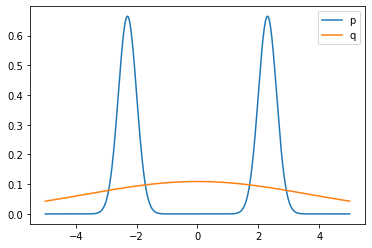

In [15]:
from scipy.stats import norm
x = np.linspace(-5, 5, 1000)
p1 = norm.pdf(x, loc=-2.3, scale=0.3)
p2 = norm.pdf(x, loc=2.3, scale=0.3)
p = (p1 + p2) / 2
q = norm.pdf(x, scale=np.sqrt(np.exp(2.3**2)*3/4)*0.3)
plt.plot(x, p, label='p')
plt.plot(x, q, label='q')
plt.legend(loc=0)
plt.show()

### Minimising $D_\text{KL}(q\|p)$

\begin{align*}
    D_\text{KL} \left( q(\mathbf w; \theta) \| p(\mathbf w | \mathcal D) \right) &= -\int q(\mathbf w; \theta) \log p(\mathbf w| \mathcal D) \mathrm d \mathbf w + \underbrace{\int q(\mathbf w; \theta) \log q(\mathbf w; \theta) \mathrm d \mathbf w}_{\text{negative entropy, } -H(q)} \\
    &= \underbrace{\mathbb E_q[\log q(\mathbf w)] - \mathbb E_q[\log p(\mathcal D|\mathbf w)] - \mathbb E_q[\log p(\mathbf w)]}_{J(\mathbf m, V)} + \log p(\mathcal D) \\
    &\geq 0
\end{align*}

NB: $\log p(\mathcal D) \geq -J(q)$, where $-J(q)$ is called ELBO (**E**vidence **L**ower **BO**und)

**Goal:**
- Minimise $J(\mathbf m, V)$ with respect to $\{\mathbf m, V\}$
- Maximise $\log p(\mathcal D)$ with respect to hyperparameters

#### Negative entropy term

\begin{align*}
    \mathbb E_{\mathcal N(\mathbf w; \mathbf m, V)} \left[ \log \mathcal N(\mathbf w; \mathbf m, V) \right] &= \mathbb E_{\mathcal N(\mathbf w; \mathbf m, V)} \left[ -\frac{1}{2} (\mathbf w - \mathbf m)^\top V^{-1} (\mathbf w - \mathbf m) \right] - \frac{1}{2} \log |2 \pi V| \\
    &= \mathbb E_{\mathcal N(\mathbf z; \mathbf 0, V)} \left[ -\frac{1}{2} \mathrm{Tr} \left( \mathbf z \mathbf z^\top V^{-1} \right) \right] - \frac{1}{2} \log |2 \pi V| \\
    &= -\frac{D}{2} - \frac{1}{2} \log |2 \pi V| \\ 
    &= -\frac{D}{2} (1 + \log 2\pi) + \sum_i \log L_{ii}
\end{align*}

> $\mathbf x^\top A \mathbf x = \mathrm{Tr} \left( \mathbf{xx}^\top A \right) = \mathrm{Tr} \left( A \mathbf{xx}^\top \right)$, $V = LL^\top$ (Cholesky decomposition)

#### Cross-entropy term

\begin{align*}
    - \mathbb E_{\mathcal N(\mathbf w; \mathbf m, V)} \left[ \log \mathcal N(\mathbf w; \mathbf 0, \sigma_w^2 \mathbb I) \right] &= \mathbb E_{\mathcal N(\mathbf w; \mathbf m, V)} \left[ \frac{1}{2} \mathbf w^\top \Sigma^{-1} \mathbf w \right] + \frac{D}{2} \log 2 \pi \sigma_w^2 \\
    &= \frac{1}{2 \sigma_w^2} \left( \mathrm{Tr}(V) + \mathbf m^\top \mathbf m \right) + \frac{D}{2} \log 2 \pi \sigma_w^2 \\
    &= \frac{1}{2 \sigma_w^2} \left( \sum_i \sum_j L_{ij}^2 + \mathbf m^\top \mathbf m \right) + \frac{D}{2} \log 2 \pi \sigma_w^2
\end{align*}

#### The log-likelihood term

**Method 1:** [Monte-Carlo approximation](#Monte-Carlo-approximation) (with $S=1$)

**Method 2:** Reparameterisation trick

$$\mathbb E_{\mathcal N(\mathbf w; \mathbf m, V)} \left[ f(\mathbf w) \right] = \mathbb E_{\mathcal N(\mathbf v; \mathbf 0, \mathbb I)} \left[ f(\mathbf m + L \mathbf v) \right]$$

- Gradients

\begin{align*}
    \nabla_{\mathbf m} \mathbb E_{\mathcal N(\mathbf w; \mathbf m, V)} \left[ f(\mathbf w) \right] &= \mathbb E_{\mathcal N(\mathbf v; \mathbf 0, \mathbb I)} \left[ \nabla_{\mathbf m} f(\mathbf m + L \mathbf v) \right] \\
    &\approx \nabla_{\mathbf m} f(\mathbf m + L \mathbf v) \\
    \nabla_L \mathbb E_{\mathcal N(\mathbf w; \mathbf m, V)} \left[ f(\mathbf w) \right] &\approx \nabla_L f(\mathbf m + L \mathbf v) \\
    &= \left[ \nabla_{\mathbf w} f(\mathbf w) \right] \mathbf v^\top
\end{align*}

# Gaussian Processes

## Kernel function

$$\mathrm{cov}(f_i, f_j) = k(\mathbf x^{(i)}, \mathbf x^{(j)})$$

- Mercer kernels: $K$, where $K_{ij} = k(\mathbf x^{(i)}, \mathbf x^{(j)})$, is positive definite matrix
- Example kernels:
    - $k(\mathbf x^{(i)}, \mathbf x^{(j)}) = \exp (-\| \mathbf x^{(i)} - \mathbf x^{(j)} \|^2)$
    - $k(\mathbf x^{(i)}, \mathbf x^{(j)}) = (1 + \| \mathbf x^{(i)} - \mathbf x^{(j)} \|)\exp (-\| \mathbf x^{(i)} - \mathbf x^{(j)} \|)$
    - **Bayesian linear regression's kernel:** $\displaystyle k(\mathbf x^{(i)}, \mathbf x^{(j)}) = \sigma_w^2 (\mathbf x^{(i)})^\top \mathbf x^{(j)} + \sigma_b^2$
        - $f(\mathbf x^{(i)}) = \mathbf w^\top \mathbf x^{(i)} + b$
        - $\mathbf w \sim \mathcal N(\mathbf 0, \sigma_w^2 \mathbb I)$
        - $b \sim \mathcal N(0, \sigma_b^2)$
    - **Gaussian kernel:** $\displaystyle k(\mathbf x^{(i)}, \mathbf x^{(j)}) = \sigma_f^2 \exp \left( -\frac{1}{2 l_d^2} \left\| \mathbf x^{(i)} - \mathbf x^{(j)} \right\|^2 \right)$
        - Marginal variance: $\sigma_f^2 = \mathrm{Var}(f_i) = k(\mathbf x^{(i)}, \mathbf x^{(i)})$
        - Lengthscale: $l_d$

In [16]:
def GKernel(xx, yy, sigma, l):
    x = np.tile(xx[:,None], yy.shape[0])
    y = np.tile(yy[:,None], xx.shape[0]).T
    return sigma**2 * np.exp(-0.5 * (x-y)**2 / l**2)

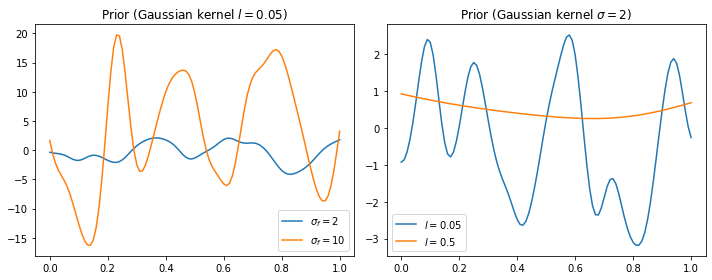

In [17]:
x = np.linspace(0,1,101)

plt.figure(figsize=(10,4))
rng = np.random.RandomState(210918)

plt.subplot(1,2,1)
for sigma in [2, 10]:
    f = rng.multivariate_normal(mean=np.zeros(101), cov=GKernel(x,x,sigma,0.05))
    plt.plot(x, f, label='$\sigma_f={}$'.format(sigma))
plt.legend(loc=0)
plt.title('Prior (Gaussian kernel $l=0.05$)')

plt.subplot(1,2,2)
for l in [0.05, 0.5]:
    f = rng.multivariate_normal(mean=np.zeros(101), cov=GKernel(x,x,2,l))
    plt.plot(x, f, label='$l={}$'.format(l))
plt.legend(loc=0)
plt.title('Prior (Gaussian kernel $\sigma=2$)')

plt.tight_layout()

## Regression

$$\left. \begin{aligned}
    \left. \begin{aligned}
        \mathbf f & \sim \mathcal N(\mathbf 0, K) \\
        K_{ij} &= k(\mathbf x^{(i)}, \mathbf x^{(j)}) \\
    \end{aligned} \right\} \quad f &\sim \mathcal{GP} \\
    \mathbf y | \mathbf f & \sim \mathcal N(\mathbf f, \sigma_y^2 \mathbb I)
\end{aligned} \right\} \quad \begin{bmatrix}
    \mathbf y \\ \mathbf f_*
\end{bmatrix} \sim \mathcal N \left( \mathbf 0, \begin{bmatrix}
    K(X,X)+\sigma_y^2 \mathbb I & K(X,X_*) \\
    K(X_*,X) & K(X_*,X_*)
\end{bmatrix} \right)$$

### Posterior
\begin{align*}
    M &= K(X,X) + \sigma_y^2 \mathbb I \\
    \mathbb E(\mathbf f_* | \mathbf y) &= K(X_*, X) M^{-1} \mathbf y \\
    \mathrm{cov}(\mathbf f_* | \mathbf y) &= K(X_*, X_*) - K(X_*, X) M^{-1} K(X,X_*)
\end{align*}

**1-D posterior:**
- $f(\mathbf x^{(*)}) | \mathbf y \sim \mathcal N(m, s^2)$
- $(\mathbf k^{(*)})_i = k(\mathbf x^{(*)}, \mathbf x^{(i)})$
- $m= (\mathbf k^{(*)})^\top M^{-1} \mathbf y$
- $s^2 = k(\mathbf x^{(*)}, \mathbf x^{(*)}) - (\mathbf k^{(*)})^\top M^{-1} \mathbf k^{(*)}$

In [18]:
def expKernel(xx, yy):
    x = np.tile(xx[:,None], yy.shape[0])
    y = np.tile(yy[:,None], xx.shape[0]).T
    return np.exp(-(x-y)**2)

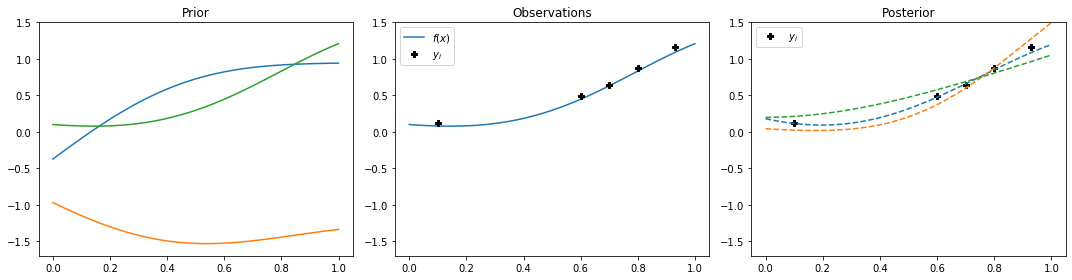

In [19]:
plt.figure(figsize=(15,4))

x = np.linspace(0,1,101)
xi = np.tile(x[:,None], 101)
xj = xi.T
K = np.exp(-(xi-xj)**2)
rng = np.random.RandomState(21918)

plt.subplot(1,3,1)
for i in range(3):
    f = rng.multivariate_normal(mean=np.zeros(101), cov=K)
    plt.plot(x,f)
plt.ylim(-1.7,1.5)
plt.title('Prior')
    
i = 100 - np.array([7,20,30,40,90])
y = rng.multivariate_normal(mean=f[i], cov=np.eye(5)*5e-3)
plt.subplot(1,3,2)
plt.plot(x,f, label='$f(x)$')
plt.plot(x[i], y, 'kP', label='$y_i$')
plt.ylim(-1.7,1.5)
plt.legend(loc=0)
plt.title('Observations')

xstar = x
fstar_mean = expKernel(xstar, x[i]).dot(np.linalg.solve(expKernel(x[i], x[i]) + np.eye(5)*5e-3, y))
fstar_cov = expKernel(xstar, xstar) - expKernel(xstar, x[i]).dot(np.linalg.solve(expKernel(x[i], x[i]) + np.eye(5)*5e-3, expKernel(x[i], xstar)))
plt.subplot(1,3,3)
plt.plot(x[i], y, 'kP', label='$y_i$')
y_post = rng.multivariate_normal(mean=fstar_mean, cov=fstar_cov, size=3)
for row in y_post:
    plt.plot(xstar, row, '--')
plt.ylim(-1.7,1.5)
plt.legend(loc=0)
plt.title('Posterior')

plt.tight_layout()

### Marginal likelihood

\begin{align*}
    \mathbf y | X, \theta &\sim \mathcal N(\mathbf 0, M) \\ 
    \theta &= \{ l_d, \sigma_f, \sigma_y, \ldots \} \text{ (kernel parameters and noise)}
\end{align*}

**Setting hyperparameters:**
- Maximum likelihood

**Regularising:**
- Regularise log noise variance $\log \sigma_y^2$, to avoid it from getting too small
- Fully Bayesian approch (posterior over hyperparameters must be approximated)
$$p(f_* | \mathbf y, X) = \int p(f_* | \mathbf y, X, \theta) p(\theta|\mathbf y, X) \mathrm d\theta$$

## Computation cost and limitations

- Inverting matrix $M$ requires $O(N^3)$ computation cost
- Computing kernel matrix $K$ costs $O(DN^2)$ and uses $O(N^2)$ memory
- Not all functions can be represented by a GP
- The probability of a function being monotonic under any GP is 0

# Ensembles and Model Combination

## Averaging predictions

- Assume model being fitted is sensible
- Assume there is not enough data to constrain it
- If model is too simple, all of the posteriors or bootstrap samples will be similar

### [Bayesian predictions](#Bayesian-Regression)

- Predictions are averaged over all possible models
- [Monte Carlo approximation](#Monte-Carlo-approximation) combines distributions and gives a broader distribution, correctly reflecting the range of the location of new output

### Bagging

- Also caled **Bootstrap Aggregation**
- Sample with replacement from original data points

## Combining models

- Mixture of experts
    - One type of [LVM](#Latent-variable-model-(LVM))
    - Neural network classifier weights the predicitions of each expert
- Decision tree
    - A series of simple rules
- Random Forests
- Boosting

**Author:** s1680642

**Licensing:** <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.